In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
df = pd.read_csv(r'C:\Users\91936\Desktop\Datasets\Covid 19\Newpage.csv', encoding="unicode_escape")

In [35]:
df.rename(columns = {'Country,Other' : 'Country', 'Serious,Critical' : 'CriticalCases', 'TotÂ Cases/1M pop' : 'TotalCasesPer1M', 'Tests/\n 1M pop' : 'TestsPer1M', 'Deaths/1M pop' : 'DeathsPer1MPop'}, inplace = True)

In [36]:
df.head(5)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,CriticalCases,TotalCasesPer1M,DeathsPer1MPop,TotalTests,TestsPer1M pop,Population,Continent,RecoveryRate,InfectionRate
0,USA,109199383,5385.0,1181273.0,26.0,107094359.0,"27,424","9,23,751","1,385",326158.0,3528.0,1.186432e+09,3543647.0,3.348053e+08,North America,98.072311,326157.898668
1,India,45001268,NaN,533293.0,NaN,0.0,NaN,NaN,NaN,31992.0,379.0,9.307980e+08,661721.0,1.406632e+09,Asia,0.000000,31992.216277
2,France,40138560,NaN,167642.0,NaN,39970918.0,NaN,0,869,612013.0,2556.0,2.714902e+08,4139547.0,6.558452e+07,Europe,99.582342,612012.731419
3,Germany,38553102,NaN,176793.0,NaN,38240600.0,NaN,"1,35,709",NaN,459602.0,2108.0,1.223324e+08,1458359.0,8.388360e+07,Europe,99.189424,459602.399497
4,Brazil,37949944,NaN,706808.0,NaN,36249161.0,NaN,"9,93,975",NaN,176222.0,3282.0,6.377617e+07,296146.0,2.153536e+08,South America,95.518352,176221.550202


In [45]:
int_columns = ['NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'Population', 'TestsPer1M pop', 'TotalTests', 'DeathsPer1MPop', 'TotalCasesPer1M']
df[int_columns] = df[int_columns].astype('Int64')

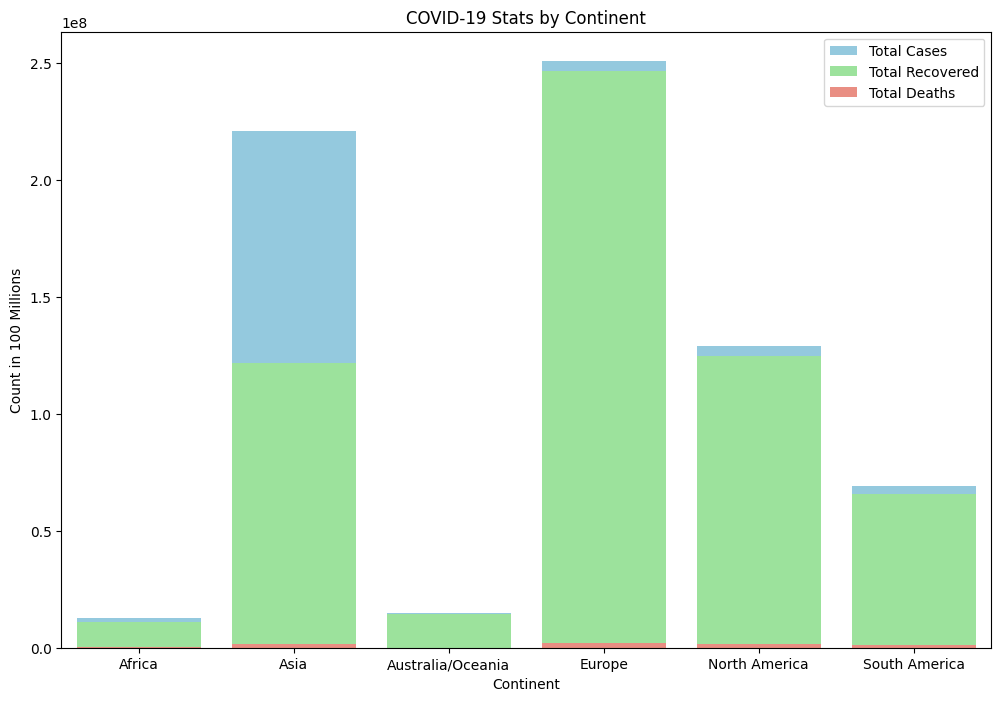

In [47]:
continent_totals = df.groupby('Continent').agg({
    'TotalCases': 'sum',
    'TotalRecovered': 'sum',
    'TotalDeaths': 'sum'
}).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Continent', y='TotalCases', data=continent_totals, color='skyblue', label='Total Cases')
sns.barplot(x='Continent', y='TotalRecovered', data=continent_totals, color='lightgreen', label='Total Recovered')
sns.barplot(x='Continent', y='TotalDeaths', data=continent_totals, color='Salmon', label='Total Deaths')

plt.title('COVID-19 Stats by Continent')
plt.xlabel('Continent')
plt.ylabel('Count in 100 Millions')
plt.legend()

plt.show()

In [48]:
df['RecoveryRate'] = df['TotalRecovered'] / df['TotalCases'] * 100
sorted_df = df.sort_values(by='RecoveryRate', ascending=False)

top10 = sorted_df.head(10)

top10 = top10.reset_index(drop=True)
top10.index = top10.index + 1

print(top10[['Country', 'RecoveryRate']])

             Country  RecoveryRate
1   Falkland Islands         100.0
2       Vatican City         100.0
3               DPRK      99.99845
4           S. Korea      99.89606
5   Marshall Islands     99.894659
6              Palau     99.839898
7              Qatar     99.837325
8             Taiwan     99.814432
9             Cyprus       99.7936
10          Mongolia     99.784507


In [49]:
sorted_df = df.sort_values(by='DeathsPer1MPop', ascending=False)

top10 = sorted_df.head(10)

top10 = top10.reset_index(drop=True)
top10.index = top10.index + 1

print(top10[['Country', 'DeathsPer1MPop']])

                   Country  DeathsPer1MPop
1                     Peru            6595
2                 Bulgaria            5633
3                  Hungary            5088
4   Bosnia and Herzegovina            5036
5          North Macedonia            4776
6                  Croatia            4542
7               Montenegro            4510
8                  Georgia            4317
9                  Czechia            3998
10                Slovakia            3877


In [61]:
total_deaths = df['TotalDeaths'].sum()
total_cases = df['TotalCases'].sum()
total_recovered = df['TotalRecovered'].sum()

print(f'Total Cases Globally: {total_cases}')
print(f'Total Deaths Globally: {total_deaths}')
print(f'Total Recovered Globally: {total_recovered }')

Total Cases Globally: 697340514
Total Deaths Globally: 6934272
Total Recovered Globally: 583925128
